<center>
# Some tips on splicing and dicing Pandas DataFrames
</center>
***

In [1]:
import datetime
print('Last updated: {}'.format(datetime.date.today().strftime('%d %B, %Y')))

Last updated: 05 July, 2019


***

<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>

## Outline:

Pandas DataFrames (two-dimensional) and Series (one-dimensional) data structures are extensively used in the brightwind library for the storage, transfer and display of data. A simple explaination is a Series is simply a single column of data which can have a index and a DataFrame is multiple columns of data with an index. Both are explained in more detail here:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

For an easier intro to them you could check out the below link. Needless to say, Pandas makes Python a powerful data analysis tool. 

https://www.geeksforgeeks.org/python-pandas-dataframe/



This tutorial will give a basic introduction to using these data structures and outline how to:

1. Seperate specific columns from DataFrames into new DataFrames and Series
1. Select specific ranges from DataFrames and Series using the index
1. Search for a specific entry in a DataFrame or Series

***

<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>

### 1: Selecting Columns

Data can be read into DataFrames easily from excel and csv files easily using the brightwind functions `load_csv()` and `load_excel()`. In the example below, data is read from the csv file <em>demo_data</em> into the DataFrame <em>data</em>.

In [2]:
import brightwind as bw
data = bw.load_csv(r'C:\Users\Stephen\Documents\Analysis\demo_data.csv')
data.head(5)

,Spd80mN,Spd80mS,Spd60mN,Spd60mS,Spd40mN,Spd40mS,Spd80mNStd,Spd80mSStd,Spd60mNStd,Spd60mSStd,...,Dir78mSStd,Dir58mS,Dir58mSStd,Dir38mS,Dir38mSStd,T2m,RH2m,P2m,PrcpTot,BattMin
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-09 15:30:00,8.370,7.911,8.160,7.849,7.857,7.626,1.240,1.075,1.060,0.947,...,6.100,110.1,6.009,112.2,5.724,0.711,100.0,935.0,0.0,12.94
2016-01-09 15:40:00,8.250,7.961,8.100,7.884,7.952,7.840,0.897,0.875,0.900,0.855,...,5.114,110.9,4.702,109.8,5.628,0.630,100.0,935.0,0.0,12.95
2016-01-09 17:00:00,7.652,7.545,7.671,7.551,7.531,7.457,0.756,0.703,0.797,0.749,...,4.172,113.1,3.447,111.8,4.016,1.126,100.0,934.0,0.0,12.75
2016-01-09 17:10:00,7.382,7.325,6.818,6.689,6.252,6.174,0.844,0.810,0.897,0.875,...,4.680,118.8,5.107,115.6,5.189,0.954,100.0,934.0,0.0,12.71
2016-01-09 17:20:00,7.977,7.791,8.110,7.915,8.140,7.974,0.556,0.528,0.562,0.524,...,3.123,115.9,2.960,113.6,3.540,0.863,100.0,934.0,0.0,12.69


<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>

Once this data is loaded, the different columns and rows in the dataframe can be isolated for use in other calculations. To isolate the first column, <em>Spd80mN</em>, from the DataFrame <em>data</em> into the Series <em> Wspd80mN</em> the command is:


In [3]:
Wspd80mN = data['Spd80mN']

<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>

The series <em>Wspd80mN</em> can then be easily passed into a function such as `monthly_means()`:

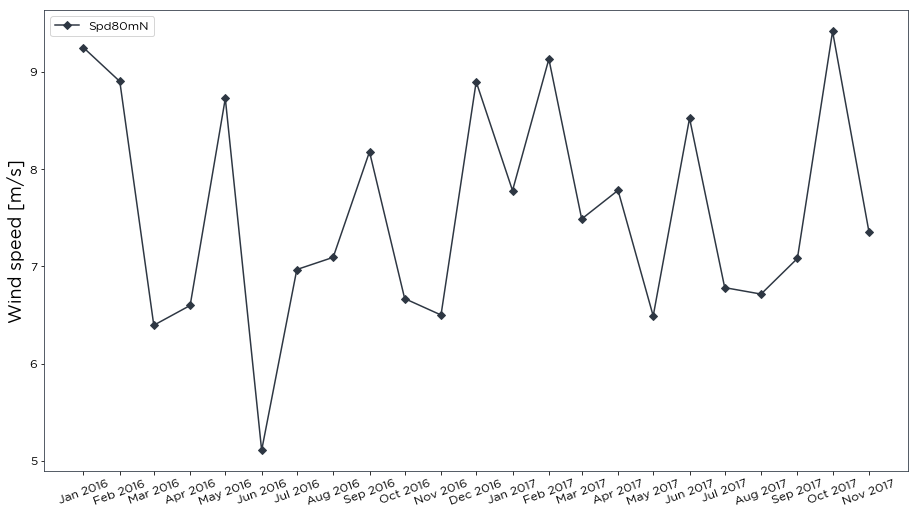

In [4]:
bw.monthly_means(Wspd80mN)

<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>

Similarly, you can select a few columns at the same time.

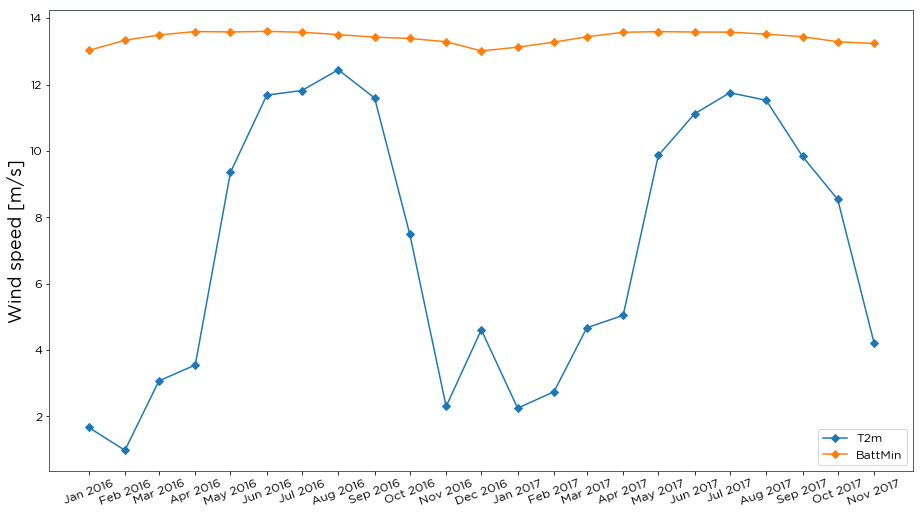

In [5]:
bw.monthly_means(data[['T2m', 'BattMin']])

<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>

Another way to select a single column is to use the `data.Spd80mN`. This only works if you column names have no spaces in them.

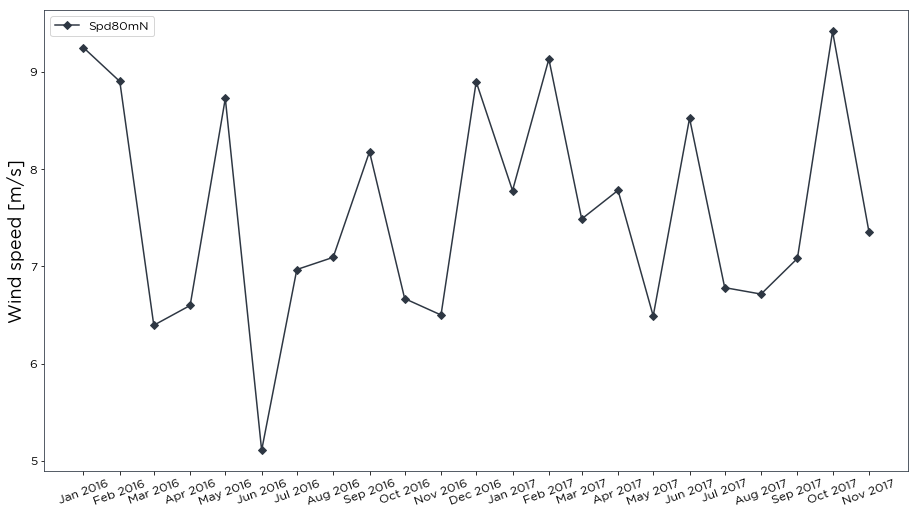

In [6]:
bw.monthly_means(data.Spd80mN)

***

<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>

### Step 2: Selecting Ranges

Ranges, or rows, from within a Series or DataFrame can be seleced. The brightwind library always asigns the index of the DataFrame to be a datetime data type making it much easier to work with the DataFrame for wind analysis purposes. For example, to select data points between two dates for the <em>data</em> DataFrame we loaded in:

In [7]:
data['2017-01-01':'2017-02-01']

,Spd80mN,Spd80mS,Spd60mN,Spd60mS,Spd40mN,Spd40mS,Spd80mNStd,Spd80mSStd,Spd60mNStd,Spd60mSStd,...,Dir78mSStd,Dir58mS,Dir58mSStd,Dir38mS,Dir38mSStd,T2m,RH2m,P2m,PrcpTot,BattMin
Timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,5.876,5.858,5.747,5.744,5.605,5.558,1.160,1.109,1.186,1.158,...,7.025,275.2,0.0,324.900,6.451,3.077,99.7,966.0,0.0,12.71
2017-01-01 00:10:00,5.911,5.898,5.539,5.621,5.324,5.345,1.114,1.079,1.005,0.977,...,7.498,275.2,0.0,319.600,9.160,2.915,99.8,966.0,0.0,12.71
2017-01-01 00:20:00,7.004,6.967,6.741,6.797,6.645,6.634,1.038,0.998,1.042,1.033,...,6.283,275.2,0.0,316.500,7.228,2.865,99.8,966.0,0.0,12.71
2017-01-01 00:30:00,7.079,7.067,6.832,6.881,6.792,6.801,0.705,0.667,0.707,0.665,...,4.661,275.2,0.0,319.100,5.279,2.693,97.8,966.0,0.0,12.71
2017-01-01 00:40:00,6.796,6.765,6.684,6.742,6.658,6.685,0.794,0.785,0.812,0.792,...,5.036,275.2,0.0,317.300,6.070,2.471,98.4,967.0,0.0,12.71
2017-01-01 00:50:00,8.380,8.350,8.070,8.170,7.861,7.915,0.999,0.949,0.920,0.871,...,5.734,275.2,0.0,314.400,5.881,2.329,99.1,966.0,0.0,12.70
2017-01-01 01:00:00,8.910,8.870,8.310,8.400,7.992,7.991,0.751,0.717,0.809,0.775,...,3.719,275.2,0.0,315.900,4.887,2.137,98.5,966.0,0.0,12.70
2017-01-01 01:10:00,8.490,8.460,8.010,8.050,7.507,7.526,0.720,0.665,0.779,0.756,...,4.544,275.2,0.0,323.500,5.816,2.006,99.0,966.0,0.0,12.70
2017-01-01 01:20:00,7.116,7.096,6.755,6.739,6.410,6.354,0.719,0.678,0.741,0.700,...,5.676,275.2,0.0,326.100,5.782,1.783,98.9,966.0,0.0,12.70


<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>

To select all the data points from a specific date, i.e. 2017-01-01, to the end of the series you can leave the area after the ':' empty.

In [8]:
data['2017-01-01':]

,Spd80mN,Spd80mS,Spd60mN,Spd60mS,Spd40mN,Spd40mS,Spd80mNStd,Spd80mSStd,Spd60mNStd,Spd60mSStd,...,Dir78mSStd,Dir58mS,Dir58mSStd,Dir38mS,Dir38mSStd,T2m,RH2m,P2m,PrcpTot,BattMin
Timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,5.876,5.858,5.747,5.744,5.605,5.558,1.160,1.109,1.186,1.158,...,7.025,275.2,0.0,324.900,6.451,3.077,99.7,966.0,0.0,12.71
2017-01-01 00:10:00,5.911,5.898,5.539,5.621,5.324,5.345,1.114,1.079,1.005,0.977,...,7.498,275.2,0.0,319.600,9.160,2.915,99.8,966.0,0.0,12.71
2017-01-01 00:20:00,7.004,6.967,6.741,6.797,6.645,6.634,1.038,0.998,1.042,1.033,...,6.283,275.2,0.0,316.500,7.228,2.865,99.8,966.0,0.0,12.71
2017-01-01 00:30:00,7.079,7.067,6.832,6.881,6.792,6.801,0.705,0.667,0.707,0.665,...,4.661,275.2,0.0,319.100,5.279,2.693,97.8,966.0,0.0,12.71
2017-01-01 00:40:00,6.796,6.765,6.684,6.742,6.658,6.685,0.794,0.785,0.812,0.792,...,5.036,275.2,0.0,317.300,6.070,2.471,98.4,967.0,0.0,12.71
2017-01-01 00:50:00,8.380,8.350,8.070,8.170,7.861,7.915,0.999,0.949,0.920,0.871,...,5.734,275.2,0.0,314.400,5.881,2.329,99.1,966.0,0.0,12.70
2017-01-01 01:00:00,8.910,8.870,8.310,8.400,7.992,7.991,0.751,0.717,0.809,0.775,...,3.719,275.2,0.0,315.900,4.887,2.137,98.5,966.0,0.0,12.70
2017-01-01 01:10:00,8.490,8.460,8.010,8.050,7.507,7.526,0.720,0.665,0.779,0.756,...,4.544,275.2,0.0,323.500,5.816,2.006,99.0,966.0,0.0,12.70
2017-01-01 01:20:00,7.116,7.096,6.755,6.739,6.410,6.354,0.719,0.678,0.741,0.700,...,5.676,275.2,0.0,326.100,5.782,1.783,98.9,966.0,0.0,12.70


<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>

To select all the data points from the start to a specific date, i.e. 2017-01-01, you can leave the area before the ':' empty.

In [9]:
data[:'2017-01-01']

,Spd80mN,Spd80mS,Spd60mN,Spd60mS,Spd40mN,Spd40mS,Spd80mNStd,Spd80mSStd,Spd60mNStd,Spd60mSStd,...,Dir78mSStd,Dir58mS,Dir58mSStd,Dir38mS,Dir38mSStd,T2m,RH2m,P2m,PrcpTot,BattMin
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-09 15:30:00,8.370,7.911,8.160,7.849,7.857,7.626,1.240,1.075,1.060,0.947,...,6.100,110.10,6.009,112.200,5.724,0.711,100.0,935.0,0.0,12.94
2016-01-09 15:40:00,8.250,7.961,8.100,7.884,7.952,7.840,0.897,0.875,0.900,0.855,...,5.114,110.90,4.702,109.800,5.628,0.630,100.0,935.0,0.0,12.95
2016-01-09 17:00:00,7.652,7.545,7.671,7.551,7.531,7.457,0.756,0.703,0.797,0.749,...,4.172,113.10,3.447,111.800,4.016,1.126,100.0,934.0,0.0,12.75
2016-01-09 17:10:00,7.382,7.325,6.818,6.689,6.252,6.174,0.844,0.810,0.897,0.875,...,4.680,118.80,5.107,115.600,5.189,0.954,100.0,934.0,0.0,12.71
2016-01-09 17:20:00,7.977,7.791,8.110,7.915,8.140,7.974,0.556,0.528,0.562,0.524,...,3.123,115.90,2.960,113.600,3.540,0.863,100.0,934.0,0.0,12.69
2016-01-09 17:30:00,8.340,8.160,8.370,8.170,8.330,8.180,0.676,0.607,0.756,0.708,...,3.260,117.20,3.600,117.400,4.526,0.731,100.0,934.0,0.0,12.67
2016-01-09 17:40:00,8.130,7.929,8.090,7.895,7.972,7.788,0.557,0.507,0.534,0.498,...,3.677,115.90,3.371,115.900,3.515,0.852,100.0,933.0,0.0,12.68
2016-01-09 17:50:00,7.480,7.283,7.706,7.486,7.649,7.481,0.588,0.526,0.590,0.529,...,3.500,119.90,3.265,118.900,3.322,0.771,100.0,933.0,0.0,12.67
2016-01-09 18:00:00,7.554,7.452,7.484,7.359,7.578,7.456,0.734,0.681,0.631,0.573,...,3.061,113.90,2.663,111.400,2.789,0.913,100.0,933.0,0.0,12.65


<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>

These operations can also be performed on a specific column:

In [10]:
data['Spd80mN']['2017-01-01':'2017-02-01']

Timestamp
2017-01-01 00:00:00     5.876
2017-01-01 00:10:00     5.911
2017-01-01 00:20:00     7.004
2017-01-01 00:30:00     7.079
2017-01-01 00:40:00     6.796
2017-01-01 00:50:00     8.380
2017-01-01 01:00:00     8.910
2017-01-01 01:10:00     8.490
2017-01-01 01:20:00     7.116
2017-01-01 01:30:00     8.060
2017-01-01 01:40:00     9.150
2017-01-01 01:50:00     7.837
2017-01-01 02:00:00     6.234
2017-01-01 02:10:00     5.896
2017-01-01 02:20:00     4.897
2017-01-01 02:30:00     4.830
2017-01-01 02:40:00     4.728
2017-01-01 02:50:00     4.207
2017-01-01 03:00:00     4.315
2017-01-01 03:10:00     5.976
2017-01-01 03:20:00     6.539
2017-01-01 03:30:00     7.523
2017-01-01 03:40:00     7.904
2017-01-01 03:50:00     7.621
2017-01-01 04:00:00     7.791
2017-01-01 04:10:00     8.190
2017-01-01 04:20:00     8.200
2017-01-01 04:30:00     8.290
2017-01-01 04:40:00     8.230
2017-01-01 04:50:00     9.600
                        ...  
2017-02-01 19:00:00     9.980
2017-02-01 19:10:00     7.264


<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>

These ranges can then too be used within functions, such as `monthly_means()`.

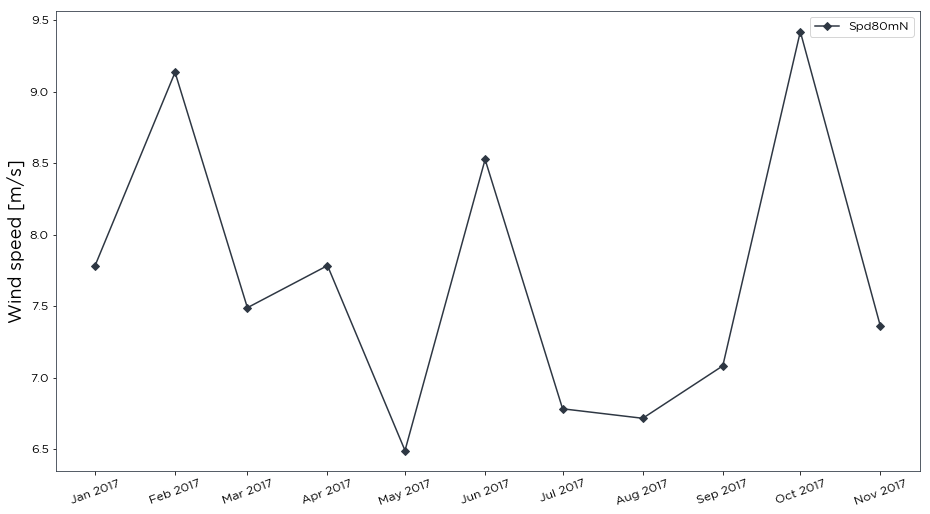

In [11]:
bw.monthly_means(data['Spd80mN']['2017-01-01':])

***

<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>

### Step 3: Selecting Specific Entries

Specific entries in DataFrames and Series can be accessed both by their index and columns name, or by their position in the DataFrame or Series.

To select a specific entry by its columns name and index, i.e. the entry in the column <em> Spd80mN </em> at timestamp <em>2016-01-09 17:00:00</em>, type:


In [12]:
data['Spd80mN']['2016-01-09 17:00:00']

7.652

<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>

To select a specific entry by its position in the DataFrame, i.e. the 3rd entry in the 1st column, use <em>.iloc</em>. When using Pandas, indexing starts at 0 for both columns and rows of DataFrames and Series. The index for the the 3rd entry in the 1st column would therefore be [2, 0]:
    

In [13]:
data.iloc[2,0]

7.652

<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>

There are many ways to slice and dice a pandas DataFrame making it a little confusing. These are just a few and are for most things all that are required.

***

<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>